# Water test
--

In [367]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import urllib.request

import time
from scipy.stats import linregress

In [406]:
#import datafile from CSV sample file and name as a variable
ar_data_import = "../CA_Water_Analysis/Ar-Water-Lab-Data.csv"
ar_data = pd.read_csv(ar_data_import)


In [407]:
#remove time code from date field
for idx, row in ar_data.iterrows(): 
    year=row['sample_date'].split(' ')[0].split('/')[-1]
    date=row['sample_date'].split(' ')[0]
    time=row['sample_date'].split(' ')[-1]
    new_date=date.split('/')[:-1]
    new_date=new_date+[f'{year}']
    new_date_str='/'.join(new_date)
    
    ar_data.loc[idx, 'sample_date']=new_date_str


In [408]:
#convert sample date field to date format
ar_data['sample_date'] = pd.to_datetime(ar_data['sample_date'])

ar_data.head()

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,13460,03S01E11H001M,03S01E11H001M,03S01E11H001M,Groundwater,37.6881,121.8270,Review Status Unknown,Alameda,WDIS_0309039,1975-07-11,NaN,Feet,Total Arsenic,0.0,0.001,mg/L,"Std Method 3500-As, C"
1,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0003482,1975-02-12,NaN,Feet,Total Arsenic,0.0,0.001,mg/L,UnkMod Arsenic
2,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0003485,1980-03-05,NaN,Feet,Total Arsenic,0.0,0.001,mg/L,UnkMod Arsenic
3,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0309048,1986-04-22,NaN,Feet,Total Arsenic,0.0,0.001,mg/L,UnkMod Arsenic
4,13494,03S02E07P003M,03S02E07P003M,03S02E07P003M,Groundwater,37.6809,121.7996,Review Status Unknown,Alameda,WDIS_0309041,1974-05-06,NaN,Feet,Total Arsenic,0.0,0.001,mg/L,UnkMod Arsenic


In [410]:


# Set the 'date' column as the index
ar_data.set_index('sample_date', inplace=True)

# Select all rows where the date is between '2022-01-02' and '2022-01-03'
selected_rows = (ar_data['2022-01-01':'2022-12-31'])

Recent_df = pd.DataFrame(selected_rows)

Recent_df.head()

/var/folders/xh/73c8v4_51k18xmmhwbkwgx9m0000gn/T/ipykernel_50036/221210887.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  selected_rows = (ar_data['2022-01-01':'2022-12-31'])


,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
sample_date,,,,,,,,,,,,,,,,,
2022-01-18,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0122B0070,1.0,Meters,Dissolved Arsenic,2.52,1.0,ug/L,EPA 200.8 (D)
2022-01-18,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0122B0070,1.0,Meters,Total Arsenic,2.47,1.0,ug/L,EPA 200.8 (T)
2022-08-22,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0822B0135,1.0,Meters,Dissolved Arsenic,2.35,1.0,ug/L,EPA 200.8 (D)
2022-08-22,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0822B0135,1.0,Meters,Total Arsenic,2.39,1.0,ug/L,EPA 200.8 (T)
2022-09-19,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,121.7494,Review Status Unknown,Alameda,D0922B0176,1.0,Meters,Dissolved Arsenic,2.37,1.0,ug/L,EPA 200.8 (D)


In [429]:
#sort by the total amount of arsenic found 
sorted_recent_df = Recent_df.sort_values(['result'], ascending=False)

#create a new dataframe from 2500 top offenders
top_offender_df = sorted_recent_df.head(50)


#who are they?

total_counties = top_offender_df['county_name'].unique()
print(total_counties)

['Tehama' 'Glenn' 'Los Angeles' 'San Bernardino' 'Kern' 'Shasta' 'Modoc'
 'Alameda']


In [435]:
#create a new dataframe of the county offenders

county_df=top_offender_df.loc[(top_offender_df["county_name"] == "Kern") |
                              (top_offender_df["county_name"] == "Tehama") |
                              (top_offender_df["county_name"] == "Glen") |
                              (top_offender_df["county_name"] == "Shasta") |
                              (top_offender_df["county_name"] == "Modoc") |
                              (top_offender_df["county_name"] == "Los Angeles") |
                              (top_offender_df["county_name"] == "Alameda") |
                              (top_offender_df["county_name"] == "San Bernardino")]

county_df.size

782

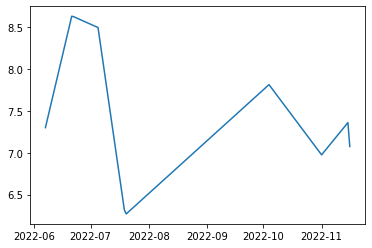

In [443]:
#create template county plot using Kern

Target_County = county_df["county_name"] == "Kern"
Target_County_df =county_df.loc[Target_County]
Target_County_avg =Target_County_df.groupby("sample_date").mean()["result"]
Target_County_av_df = pd.DataFrame({"Kern": Target_County_avg})
plt.plot(Target_County_av_df)



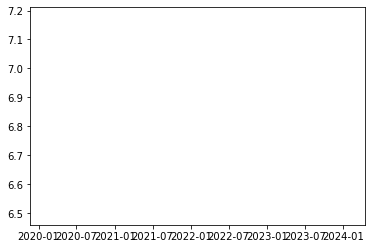

In [448]:
Target_County = county_df["county_name"] == "Modoc"
Target_County_df =county_df.loc[Target_County]
Target_County_avg =Target_County_df.groupby("sample_date").mean()["result"]
Target_County_av_df = pd.DataFrame({"Modoc": Target_County_avg})
plt.plot(Target_County_av_df)

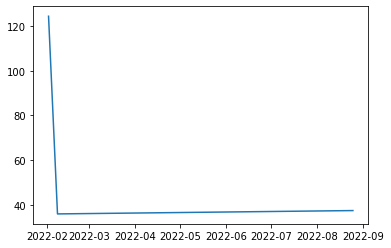

In [451]:
#plot Tehama county
Target_County = county_df["county_name"] == "Tehama"
Target_County_df =county_df.loc[Target_County]
Target_County_avg =Target_County_df.groupby("sample_date").mean()["result"]
Target_County_av_df = pd.DataFrame({"Tehama": Target_County_avg})
plt.plot(Target_County_av_df)

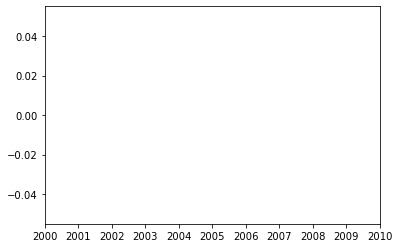

In [452]:
#plot San Bernadino county
Target_County = county_df["county_name"] == "San Bernadino"
Target_County_df =county_df.loc[Target_County]
Target_County_avg =Target_County_df.groupby("sample_date").mean()["result"]
Target_County_av_df = pd.DataFrame({"San Bernadino": Target_County_avg})
plt.plot(Target_County_av_df)

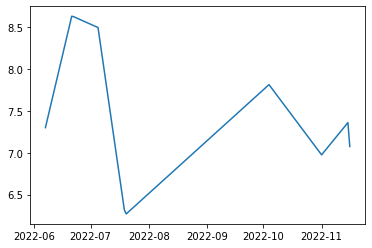

In [453]:
#plot Kern county
Kern_df = county_df.loc[county_df["county_name"] == "Kern"]
Kern_avg = Kern_df.groupby("sample_date").mean()["result"]
Kern_av_df = pd.DataFrame({"Kern": Kern_avg})
plt.plot(Kern_av_df)

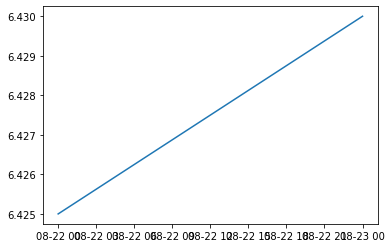

In [454]:
#plot Alameda county
Target_County = county_df["county_name"] == "Alameda"
Target_County_df =county_df.loc[Target_County]
Target_County_avg =Target_County_df.groupby("sample_date").mean()["result"]
Target_County_av_df = pd.DataFrame({"Alameda": Target_County_avg})
plt.plot(Target_County_av_df)

In [413]:
#create a list of counties
countys = ['Sacramento', 'Kern', 'Butte', 'Lassen', 'Shasta', 'Tehama', 'Modoc', 'Glenn',
 'Colusa', 'Alpine', 'Humboldt', 'Mendocino','Lake','Trinity', 'Siskiyou',
 'Sutter', 'Plumas', 'Mono', 'Los Angeles', 'Yolo', 'San Bernardino', 'Sierra',
 'Alameda', 'Merced', 'Solano' ,'Contra Costa', 'Kings', 'Del Norte',
 'Riverside', 'San Joaquin', 'Yuba', 'Tulare', 'Inyo', 'Imperial', 'El Dorado',
 'Santa Cruz', 'Napa', 'Monterey', 'Fresno', 'San Diego', 'Calaveras', 'Amador',
 'Sonoma', 'Santa Clara', 'Tuolumne', 'Placer', 'Ventura', 'San Luis Obispo',
 'Santa Barbara', 'Nevada', 'Orange', 'Stanislaus', 'Madera', 'San Mateo',
 'San Francisco', 'San Benito', 'Mariposa']
#print the counties as a list

    


In [207]:
#count number of entries by county

total_counties = sorted_ar_df['county_name'].unique().size
worst_counties = sorted_top_offender_df.groupby(['county_name'])
sorted_station_summary = worst_counties.sort_values(['county_name'], ascending=False)
sorted_station_summary

#total_counties


AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'